# <center> Лабораторная работа 3
## <center> Деревья решений. Классификатор пола по голосу
### Автор: Стецук Максим 1гр.2п.гр.

In [1]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn import tree
from sklearn import model_selection 
from sklearn import metrics

In [2]:
# Чтение данных
voice_data = pd.read_csv('../data/voice_gender.csv')
voice_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [3]:
# Проверка на наличие пропусков
voice_data.isnull().sum().sum()

0

In [4]:
# Факторы и целевой признак
features = voice_data.drop('label', axis=1).columns
X, y = voice_data[features], voice_data['label']

In [5]:
# Разбиение на тренировочную и тестовую выборки с помощью train_test_split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,test_size=0.2, stratify=y, random_state=42)
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (2534, 20)
Test shape: (634, 20)


### <center> Task 1

<center> Решающие пни

In [6]:
from sklearn import tree
#Создаём объект класса DecisionTreeClassifier
decision_tree_model1 = tree.DecisionTreeClassifier(
    criterion='entropy', 
    max_depth=1, 
    random_state=42
)

decision_tree_model1

DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=42)

In [7]:
# Обучение модели на тренировочной выборке
decision_tree_model1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=42)

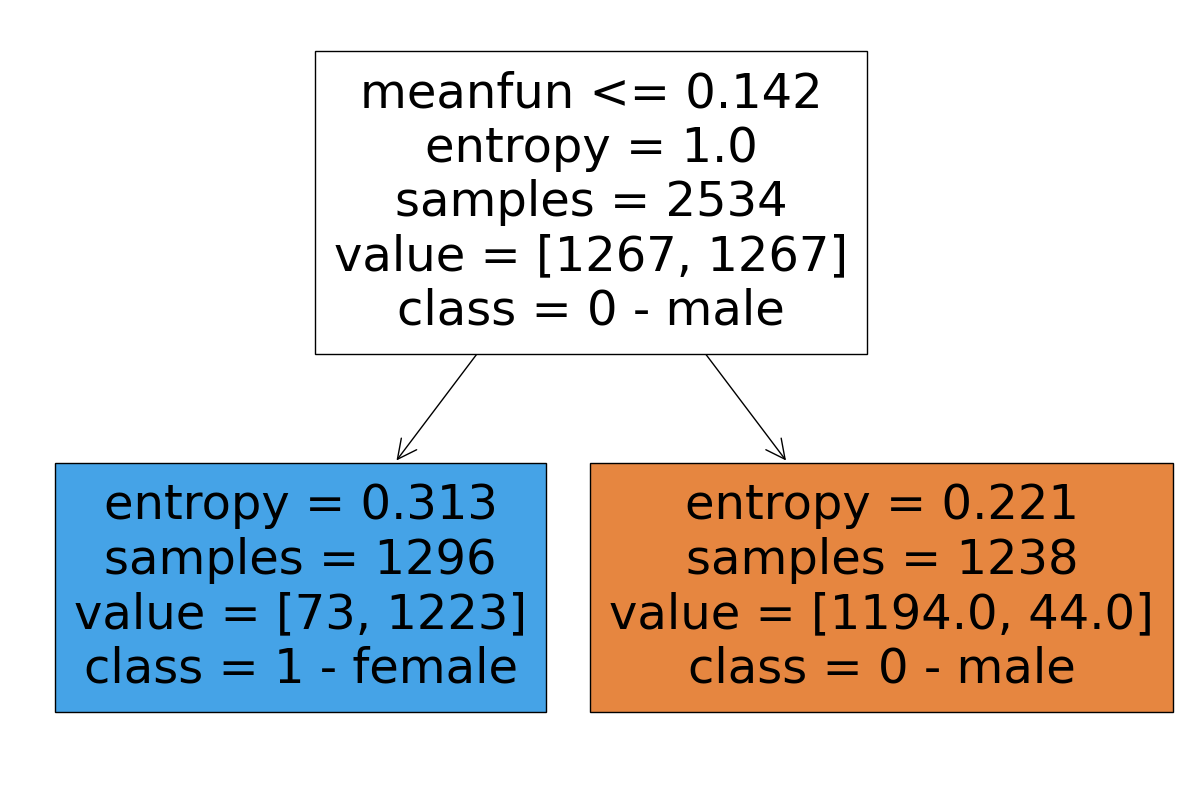

In [8]:
# Визуализируем обученную модель
#Создаём фигуру для визуализации графа
fig = plt.figure(figsize=(15, 10))
#Строим граф дерева решений
tree_graph = tree.plot_tree(
    decision_tree_model1,
    feature_names=X.columns, #названия факторов
    class_names=["0 - male", "1 - female"], #названия классов
    filled=True, #расцветка графа
    )

In [9]:
from sklearn.metrics import accuracy_score

# Предсказание на тестовой выборке
y_pred_test_depth1 = decision_tree_model1.predict(X_test)

# Рассчитываем accuracy
accuracy_depth1 = accuracy_score(y_test, y_pred_test_depth1)

accuracy_depth1_rounded = round(accuracy_depth1, 3)

print("Значение метрики accuracy на тестовой выборке для модели с глубиной 1:", accuracy_depth1_rounded)


Значение метрики accuracy на тестовой выборке для модели с глубиной 1: 0.956


### <center> Task 2

<center> Увеличение глубины дерева

In [10]:
#Создаём объект класса DecisionTreeClassifier
decision_tree_model2 = tree.DecisionTreeClassifier(
    criterion='entropy', 
    max_depth=2, 
    random_state=42
)

decision_tree_model2

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

In [11]:
# Обучение модели на тренировочной выборке
decision_tree_model2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

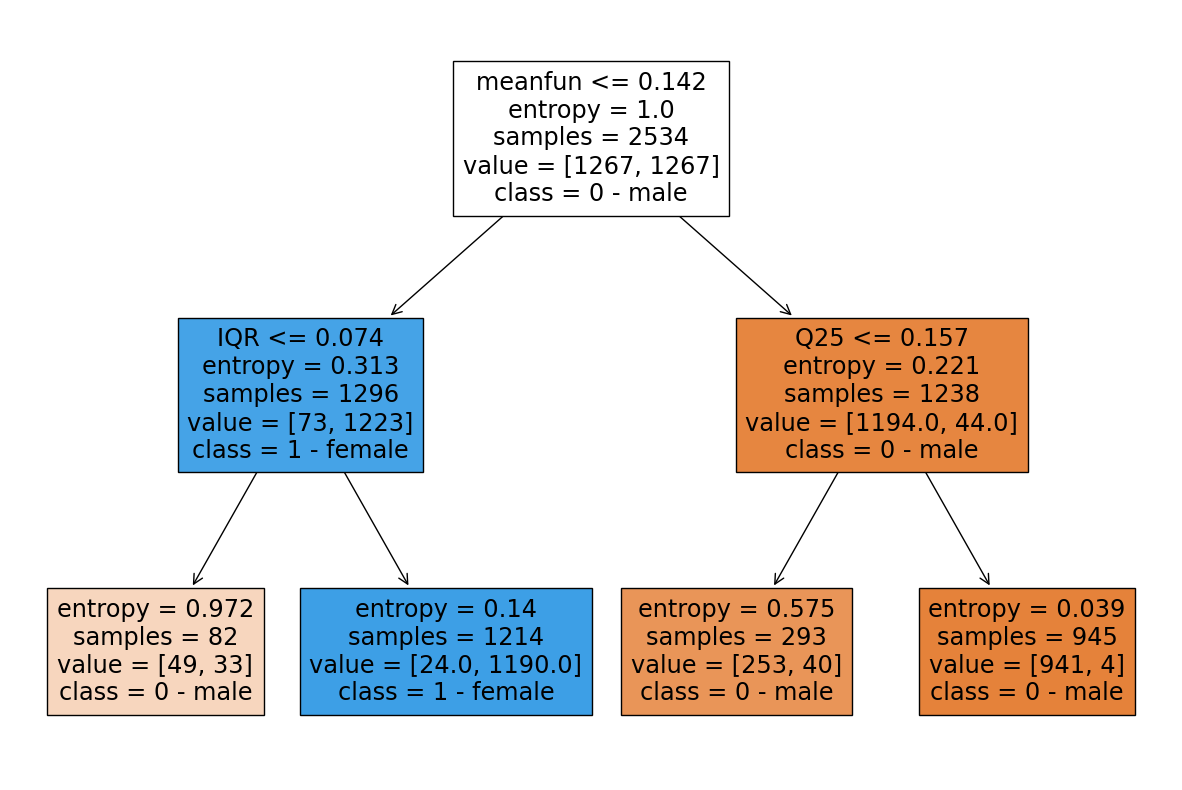

In [12]:
# Визуализируем обученную модель
#Создаём фигуру для визуализации графа
fig = plt.figure(figsize=(15, 10))
#Строим граф дерева решений
tree_graph = tree.plot_tree(
    decision_tree_model2,
    feature_names=X.columns, #названия факторов
    class_names=["0 - male", "1 - female"], #названия классов
    filled=True, #расцветка графа
    )

In [13]:
# Предсказание на тестовой выборке
y_pred_test_depth2 = decision_tree_model2.predict(X_test)

# Рассчитываем accuracy
accuracy_depth2 = accuracy_score(y_test, y_pred_test_depth2)

accuracy_depth2_rounded = round(accuracy_depth2, 3)

print("Значение метрики accuracy на тестовой выборке для модели с глубиной 2:", accuracy_depth2_rounded)


Значение метрики accuracy на тестовой выборке для модели с глубиной 2: 0.962


### <center> Task 3

<center> Б’ольшая свобода для дерева решений

In [14]:
#Создаём объект класса DecisionTreeClassifier
decision_tree_model3 = tree.DecisionTreeClassifier(
    criterion='entropy', 
    random_state=0
)

decision_tree_model3

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [15]:
# Обучение модели на тренировочной выборке
decision_tree_model3.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [16]:
# Исследование дерева
depth = decision_tree_model3.get_depth()
n_leaves = decision_tree_model3.get_n_leaves()
print(f'Глубина полученного дерева: {depth}')
print(f'Количество листьев в полученном дереве: {n_leaves}')

Глубина полученного дерева: 12
Количество листьев в полученном дереве: 54


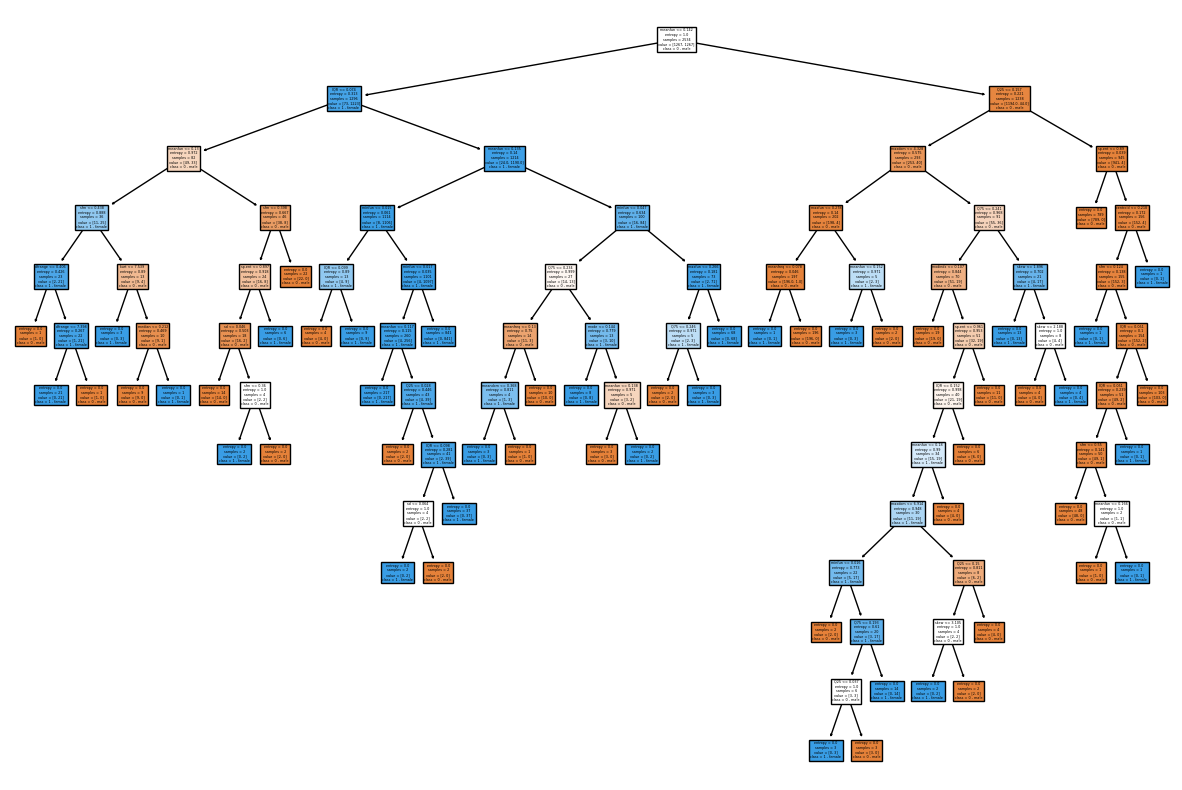

In [17]:
# Визуализируем обученную модель
#Создаём фигуру для визуализации графа
fig = plt.figure(figsize=(15, 10))
#Строим граф дерева решений
tree_graph = tree.plot_tree(
    decision_tree_model3,
    feature_names=X.columns, #названия факторов
    class_names=["0 - male", "1 - female"], #названия классов
    filled=True, #расцветка графа
    )

In [18]:
# Предсказание на тестовой выборке
y_pred_test_depth3_test = decision_tree_model3.predict(X_test)
y_pred_test_depth3_train = decision_tree_model3.predict(X_train)

# Рассчитываем accuracy
accuracy_depth3_test = accuracy_score(y_test, y_pred_test_depth3_test)
accuracy_depth3_train = accuracy_score(y_train, y_pred_test_depth3_train)

accuracy_depth3_rounded_test = round(accuracy_depth3_test, 3)
accuracy_depth3_rounded_train = round(accuracy_depth3_train, 3)

print("Значение метрики accuracy на тестовой выборке для свободной модели:", accuracy_depth3_rounded_test)
print("Значение метрики accuracy на тренировочной выборке для свободной модели:", accuracy_depth3_rounded_train)


Значение метрики accuracy на тестовой выборке для свободной модели: 0.973
Значение метрики accuracy на тренировочной выборке для свободной модели: 1.0


### <center> Task 4

<center> Оптимальные внешние параметры модели дерева решений

In [19]:
#Создаём объект класса DecisionTreeClassifier
decision_tree_model_optimal = tree.DecisionTreeClassifier()

decision_tree_model_optimal

DecisionTreeClassifier()

In [20]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Определение сетки параметров
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [3, 4, 5, 10]
}

cv = StratifiedKFold(n_splits=5)

grid_search = GridSearchCV(estimator=decision_tree_model_optimal, param_grid=param_grid, cv=cv, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Наилучшие параметры:", best_params)
print("Оценка качества модели:", best_score)

Наилучшие параметры: {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 3}
Оценка качества модели: 0.9672466886513709


In [21]:
#Создаём объект класса DecisionTreeClassifier
decision_tree_model_best = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_depth=6,
    min_samples_split=3
)

decision_tree_model_best

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=3)

In [22]:
# Обучение модели на тренировочной выборке
decision_tree_model_best.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=3)

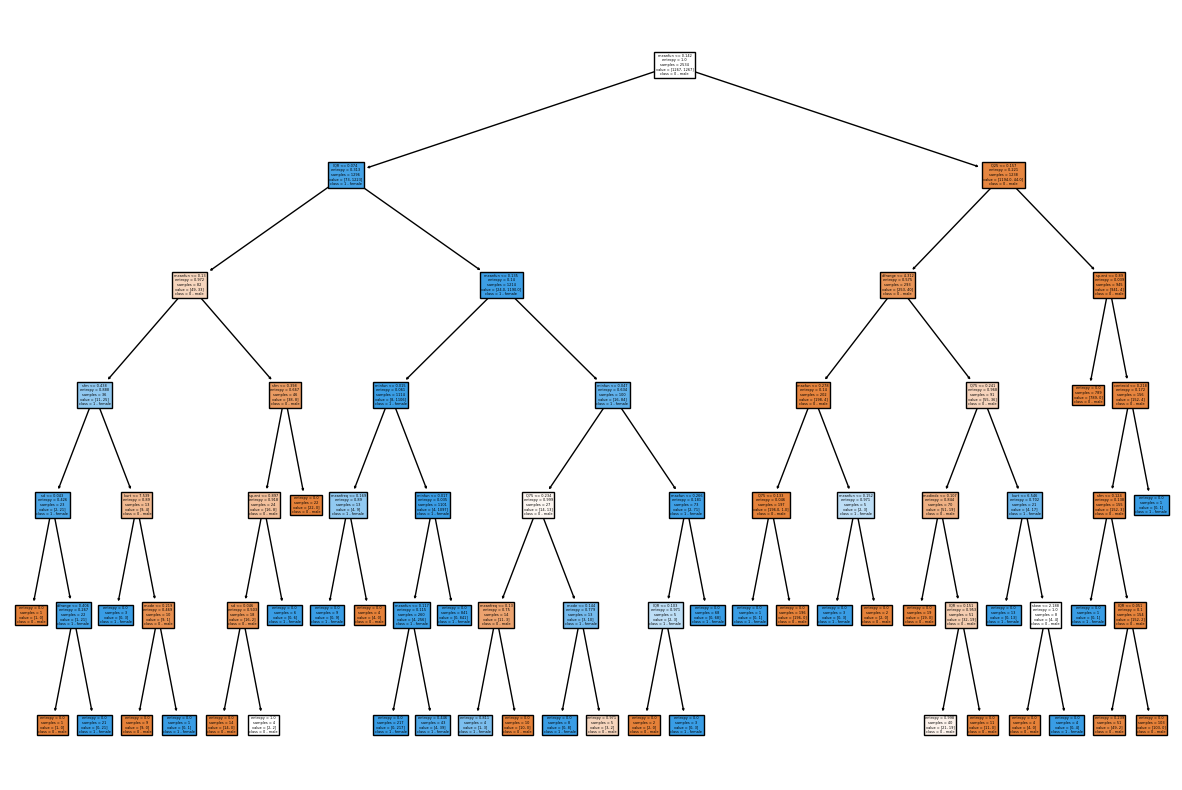

In [23]:
# Визуализируем обученную модель
#Создаём фигуру для визуализации графа
fig = plt.figure(figsize=(15, 10))
#Строим граф дерева решений
tree_graph = tree.plot_tree(
    decision_tree_model_best,
    feature_names=X.columns, #названия факторов
    class_names=["0 - male", "1 - female"], #названия классов
    filled=True, #расцветка графа
    )

In [24]:
# Предсказание на тестовой выборке
y_pred_test_best_test = decision_tree_model_best.predict(X_test)
y_pred_test_best_train = decision_tree_model_best.predict(X_train)

# Рассчитываем accuracy
accuracy_best_test = accuracy_score(y_test, y_pred_test_best_test)
accuracy_best_train = accuracy_score(y_train, y_pred_test_best_train)

accuracy_best_rounded_test = round(accuracy_best_test, 3)
accuracy_best_rounded_train = round(accuracy_best_train, 3)

print("Значение метрики accuracy на тестовой выборке для оптимальной модели:", accuracy_best_rounded_test)
print("Значение метрики accuracy на тренировочной выборке для оптимальной модели:", accuracy_best_rounded_train)


Значение метрики accuracy на тестовой выборке для оптимальной модели: 0.978
Значение метрики accuracy на тренировочной выборке для оптимальной модели: 0.988


### <center> Task 5
<center> Важность факторов

In [25]:
print(decision_tree_model_best.feature_importances_)

[0.00768204 0.00366974 0.         0.02790518 0.01213107 0.07023364
 0.00326451 0.00556526 0.00956415 0.01027106 0.00406706 0.00223551
 0.7856818  0.0205308  0.00930412 0.         0.         0.
 0.02362472 0.00426933]


Text(0, 0.5, 'Importances')

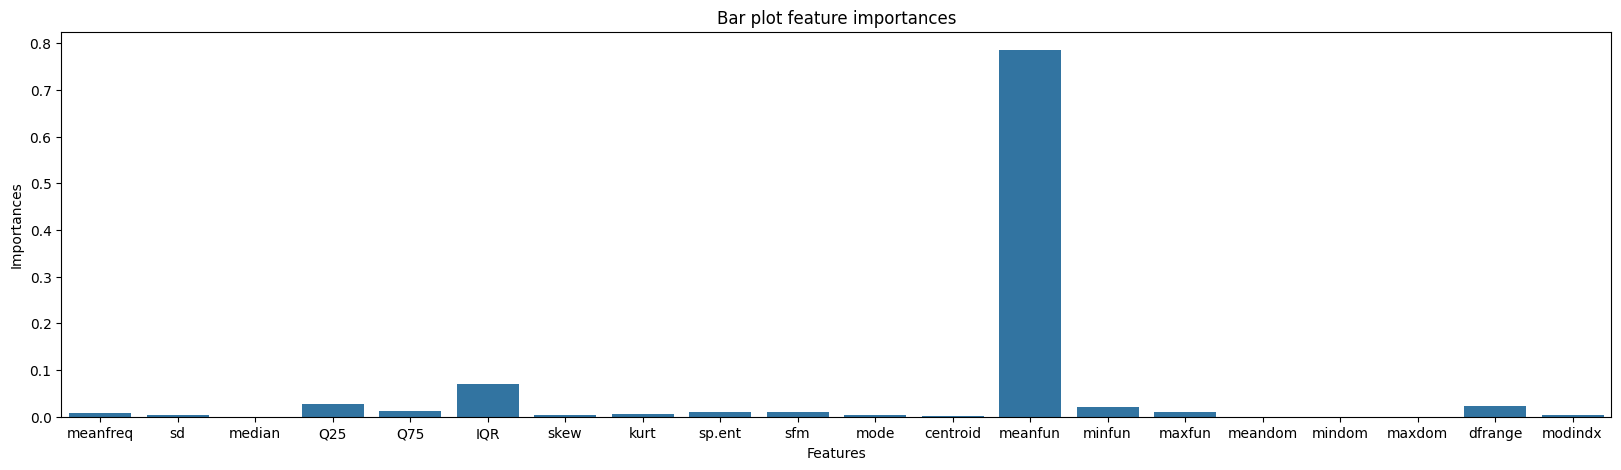

In [26]:
fig, ax = plt.subplots(figsize=(20, 5)) #фигура + координатная плоскость
feature = X.columns #признаки
feature_importances = decision_tree_model_best.feature_importances_ #важность признаков
#Строим столбчатую диаграмму
sns.barplot(x=feature, y=feature_importances, ax=ax)
#Добавляем подпись графику, осям абсцисс и ординат
ax.set_title('Bar plot feature importances')
ax.set_xlabel('Features')
ax.set_ylabel('Importances')

Топ 3 наиболее важных фактора:
1. meanfun
2. IQR
3. Q25